<h1 style="color:black; background-color:darksalmon;padding:1%;border-radius:15px;text-align:left;font-family:Times New Roman;font-size:42px;">Heart Failure Prediction</h1>

<img src="https://img.goodfon.ru/original/2560x1600/3/b7/heart-love-wood-para-romantic-vliublennye-liubov-serdtse-5.jpg" alt="Образец изображения" width="1000" height ="600">

## <h2 style="font-size:35px;color:darkcyan;">Library Importing<h2>

In [116]:
import pandas as pd
from pandas.api.types import is_numeric_dtype

import plotly.express as px

import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.base import TransformerMixin, BaseEstimator
from sklearn.metrics import roc_auc_score

import matplotlib.pyplot as plt

from phik.report import plot_correlation_matrix

In [117]:
pd.set_option('display.max_columns',None)

## <h2 style="font-size:35px;color:darkcyan;">Exploratory Data Analysis<h2>

In [118]:
df = pd.read_csv(r"C:\Users\Hello Tasha\Desktop\1T_py\Homework\Task_2.9\heart_adapt_train.csv")
df.head(10)


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,74.0,M,NAP,138.0,NaN,0,Normal,116,N,0.2,Up,0
1,58.0,M,NAP,132.0,224.0,0,LVH,173,N,3.2,Up,1
2,44.0,M,ATA,150.0,288.0,0,Normal,150,Y,3.0,Flat,1
3,50.0,M,ASY,144.0,349.0,0,LVH,120,Y,1.0,Up,1
4,NaN,M,ASY,145.0,248.0,0,Normal,96,Y,2.0,Flat,1
5,51.0,M,NAP,135.0,160.0,0,Normal,150,N,2.0,Flat,1
6,53.0,M,ASY,154.0,NaN,1,ST,140,Y,1.5,Flat,1
7,38.0,M,NAP,138.0,175.0,0,Normal,173,N,0.0,Up,0
8,56.0,M,NAP,125.0,NaN,1,Normal,98,N,-2.0,Flat,1
9,61.0,M,ASY,190.0,287.0,1,LVH,150,Y,2.0,Down,1


### <h3 style="font-size:25px;color:darkcyan;">Attributies<h3>

<ul>
  <li style="list-style-type:circle;font-size:20px"><i><b>Age:</b></i> age of the patient [years]</li>
  <li style="list-style-type:circle;font-size:20px"><i><b>Sex:</b></i> sex of the patient [M: Male, F: Female]</li>
  <li style="list-style-type:circle;font-size:20px"><i><b>ChestPainType:</b></i> chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]</li>
  <li style="list-style-type:circle;font-size:20px"><i><b>RestingBP:</b></i> resting blood pressure [mm Hg]</li>
  <li style="list-style-type:circle;font-size:20px"><i><b>Cholesterol:</b></i> serum cholesterol [mm/dl]</li>
  <li style="list-style-type:circle;font-size:20px"><i><b>FastingBS:</b></i> fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]</li>
  <li style="list-style-type:circle;font-size:20px"><i><b>RestingECG:</b></i> resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]</li>
  <li style="list-style-type:circle;font-size:20px"><i><b>MaxHR:</b></i> maximum heart rate achieved [Numeric value between 60 and 202]</li>
  <li style="list-style-type:circle;font-size:20px"><i><b>ExerciseAngina:</b></i> exercise-induced angina [Y: Yes, N: No]</li>
  <li style="list-style-type:circle;font-size:20px"><i><b>Oldpeak:</b></i> oldpeak = ST [Numeric value measured in depression]</li>
  <li style="list-style-type:circle;font-size:20px"><i><b>ST_Slope:</b></i> the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]</li>
  <li style="list-style-type:circle;font-size:20px"><i><b>HeartDisease:</b></i> output class [1: heart disease, 0: Normal]</li>
</ul>



### <h3 style="font-size:25px;color:darkcyan;">Emptinesses check<h3>

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 589 entries, 0 to 588
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             533 non-null    float64
 1   Sex             589 non-null    object 
 2   ChestPainType   589 non-null    object 
 3   RestingBP       588 non-null    float64
 4   Cholesterol     462 non-null    float64
 5   FastingBS       589 non-null    int64  
 6   RestingECG      589 non-null    object 
 7   MaxHR           589 non-null    int64  
 8   ExerciseAngina  589 non-null    object 
 9   Oldpeak         589 non-null    float64
 10  ST_Slope        589 non-null    object 
 11  HeartDisease    589 non-null    int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 55.3+ KB


<p style = "font-color:black;font-size:18px; padding:1%; border:solid;border-width:thin;border-color:darkcyan"> Dataset has 589 objects with 11 features (6 categorical and 5 numerical) and 1 target. Features <i>Age</i>, <i>Cholesterol</i> and <i>RestingBP</i> have emptinesses. <p>

In [120]:
print('Emptinesses of Age %:',round(df["Age"].isna().sum()/df["Age"].shape[0]*100,2))
print('Emptinesses of RestingBP %:',round(df["RestingBP"].isna().sum()/df["RestingBP"].shape[0]*100,2))

Emptinesses of Age %: 9.51
Emptinesses of RestingBP %: 0.17


<p style = "font-size:20px;padding:1%; border:solid;border-width:thin;border-color:darkcyan"> The share of emptinesses is less than 10 percent, so will delete them. <p>

In [121]:
df = df.dropna(subset=["Age","RestingBP"])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 532 entries, 0 to 588
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             532 non-null    float64
 1   Sex             532 non-null    object 
 2   ChestPainType   532 non-null    object 
 3   RestingBP       532 non-null    float64
 4   Cholesterol     420 non-null    float64
 5   FastingBS       532 non-null    int64  
 6   RestingECG      532 non-null    object 
 7   MaxHR           532 non-null    int64  
 8   ExerciseAngina  532 non-null    object 
 9   Oldpeak         532 non-null    float64
 10  ST_Slope        532 non-null    object 
 11  HeartDisease    532 non-null    int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 54.0+ KB


In [122]:
print('Emptinesses of Cholesterol %:',round(df["Cholesterol"].isna().sum()/df['Cholesterol'].shape[0]*100,2))

Emptinesses of Cholesterol %: 21.05


<p style = "font-size:20px;padding:1%; border:solid;border-width:thin;border-color:darkcyan"> The share of emptinesses is more than 10 percent, so will replace with median. <p>

In [123]:
df["Cholesterol"] = df["Cholesterol"].fillna(df["Cholesterol"].median())
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 532 entries, 0 to 588
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             532 non-null    float64
 1   Sex             532 non-null    object 
 2   ChestPainType   532 non-null    object 
 3   RestingBP       532 non-null    float64
 4   Cholesterol     532 non-null    float64
 5   FastingBS       532 non-null    int64  
 6   RestingECG      532 non-null    object 
 7   MaxHR           532 non-null    int64  
 8   ExerciseAngina  532 non-null    object 
 9   Oldpeak         532 non-null    float64
 10  ST_Slope        532 non-null    object 
 11  HeartDisease    532 non-null    int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 54.0+ KB


### <h3 style="font-size:25px;color:darkcyan;">Duplicates check<h3>

In [124]:
df.duplicated().sum()

0

<p style = "font-size:20px;padding:1%; border:solid;border-width:thin;border-color:darkcyan"> There are not duplicates <p>

### <h3 style="font-size:25px;color:darkcyan;">Numerical features<h3>

<p style = "font-size:20px"> Numerical features are: Age, RestingBP, Cholesterol, MaxHR, Oldpeak <p>

* <p style = "font-size:20px"> Age<p>

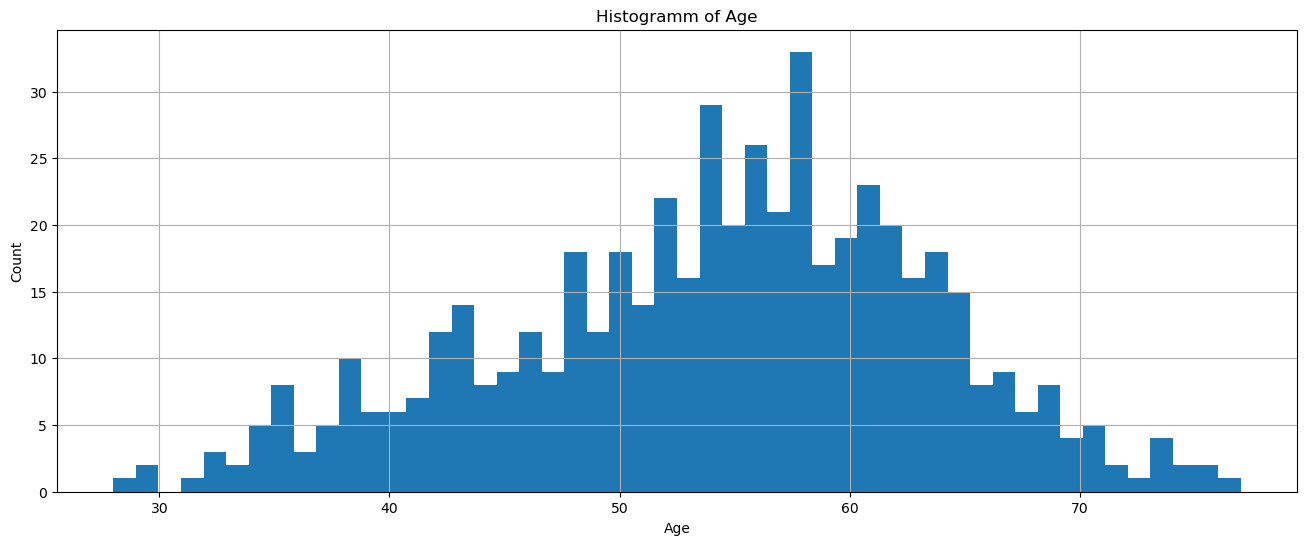

In [125]:
plt.figure(figsize=(16,6))
plt.title('Histogramm of Age')
plt.hist(df['Age'], bins=50)
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid(True)
plt.show()

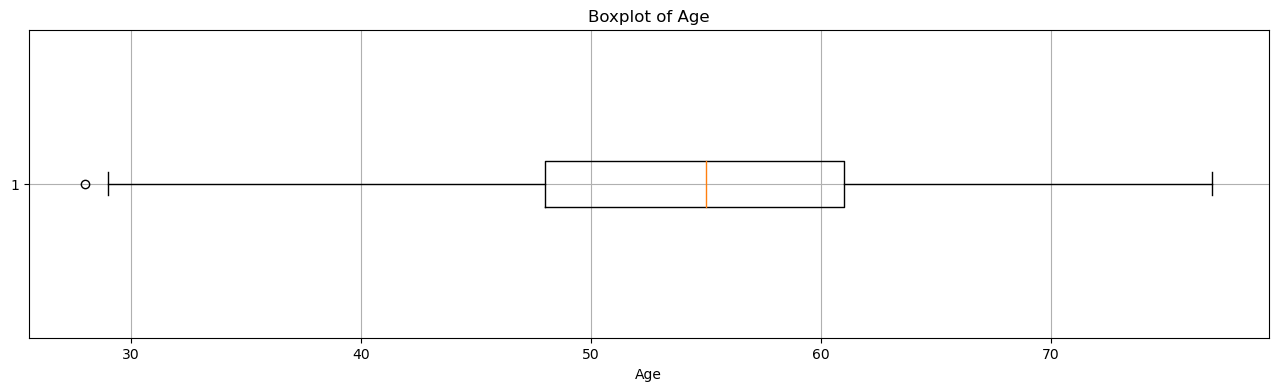

In [126]:
plt.figure(figsize=(16,4))
plt.title('Boxplot of Age')
plt.boxplot(df['Age'],vert=False)
plt.xlabel('Age')
plt.grid(True)
plt.show()

<p style = "font-size:20px;padding:1%; border:solid;border-width:thin;border-color:darkcyan"> Most people are between ages 50-65. Age hasn't outliers <p>

* <p style = 'font-size: 20px'> RestingBP <p>

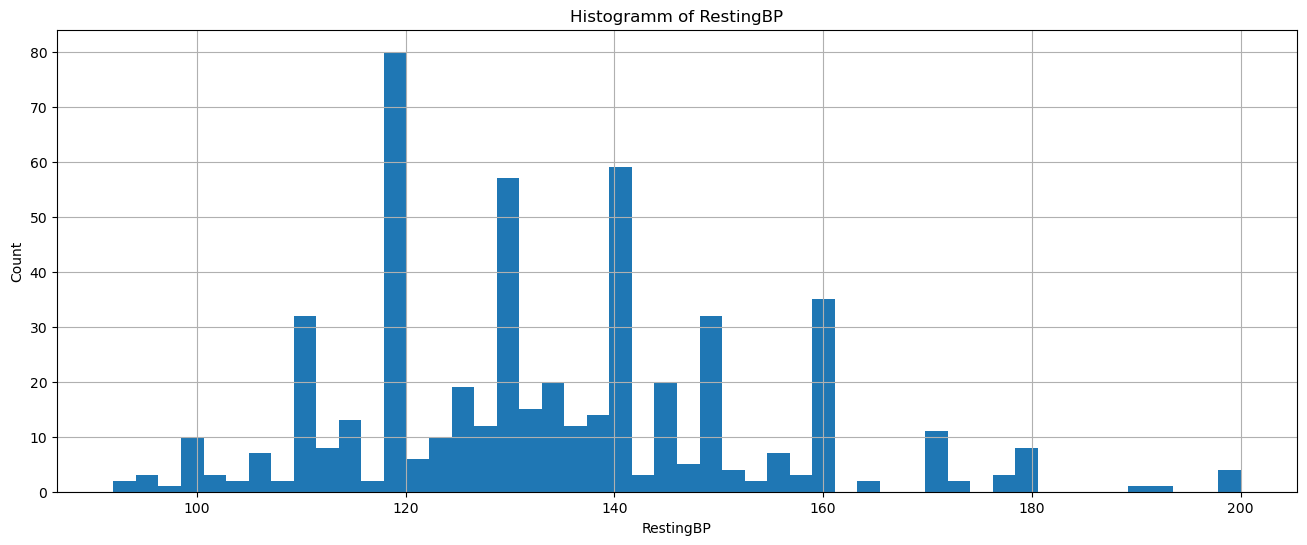

In [127]:
plt.figure(figsize=(16,6))
plt.title('Histogramm of RestingBP')
plt.hist(df['RestingBP'], bins=50)
plt.xlabel('RestingBP')
plt.ylabel('Count')
plt.grid(True)
plt.show()

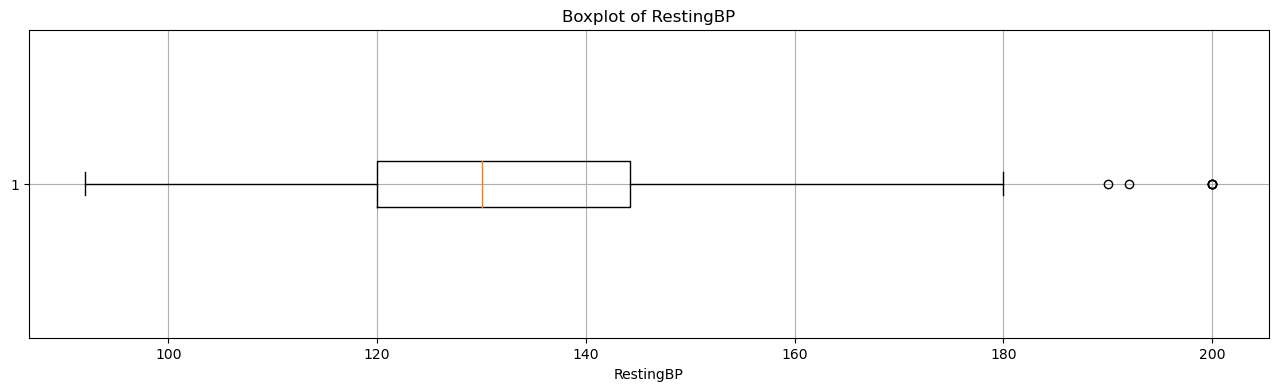

In [128]:
plt.figure(figsize=(16,4))
plt.title('Boxplot of RestingBP')
plt.boxplot(df['RestingBP'],vert=False)
plt.xlabel('RestingBP')
plt.grid(True)
plt.show()

In [129]:
print('Min value of RestingBP:', min(df['RestingBP']))
print('Max value of RestingBP:', max(df['RestingBP']))

Min value of RestingBP: 92.0
Max value of RestingBP: 200.0


<p style = "font-size:20px;padding:1%; border:solid;border-width:thin;border-color:darkcyan"> There are not information about category blood pressure (sistolic or diastolic) but min and max value (92 and 200) mean that its probably sistolic blood pressure. These values for diastolic are too high. So values higher upper fence are not outliers<p>

<img src="https://i.pinimg.com/originals/6c/5c/45/6c5c45df2c990e26baf4cf32b517e5ee.jpg" alt="Образец изображения" width="800" height ="500">

* <p style='font-size:20px'> Cholesterol<p>

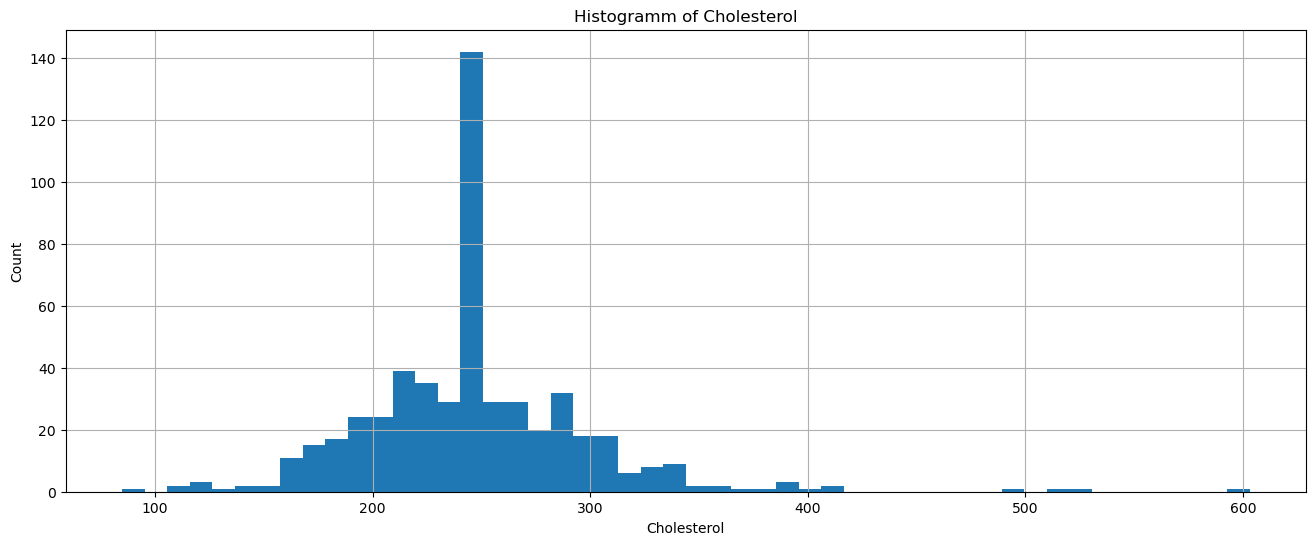

In [130]:
plt.figure(figsize=(16,6))
plt.title('Histogramm of Cholesterol')
plt.hist(df['Cholesterol'], bins=50)
plt.xlabel('Cholesterol')
plt.ylabel('Count')
plt.grid(True)
plt.show()

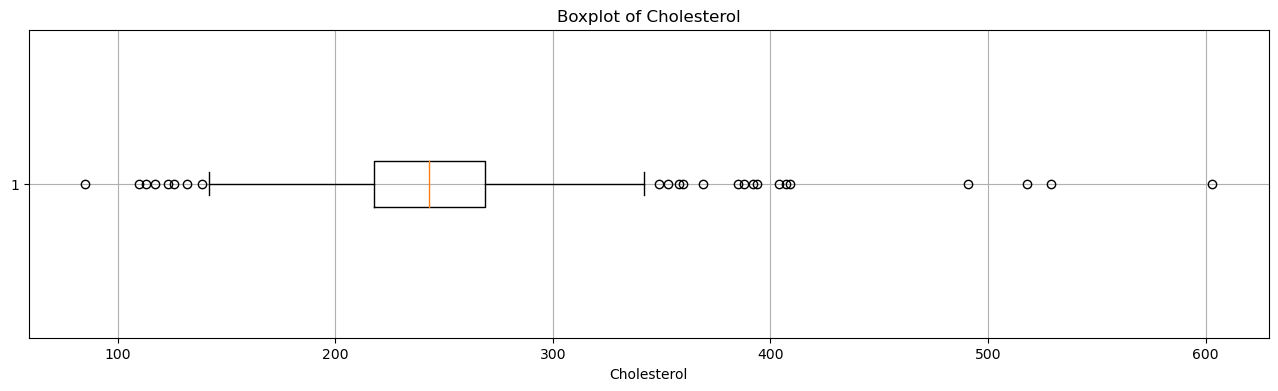

In [131]:
plt.figure(figsize=(16,4))
plt.title('Boxplot of Cholesterol')
plt.boxplot(df['Cholesterol'],vert=False)
plt.xlabel('Cholesterol')
plt.grid(True)
plt.show()

<p style='font-size:20px;padding:1%; border:solid;border-width:thin;border-color:darkcyan'> Values mean that its probably total cholesterol. All values can be realistic. Most of people have High level of cholesterol. 

<img src="https://i.pinimg.com/736x/74/20/e2/7420e2917248b641067cd3485c2673b4.jpg" alt="Образец изображения" width="700" height ="500">

* <p style='font-size:20px'> MaxHR<p>

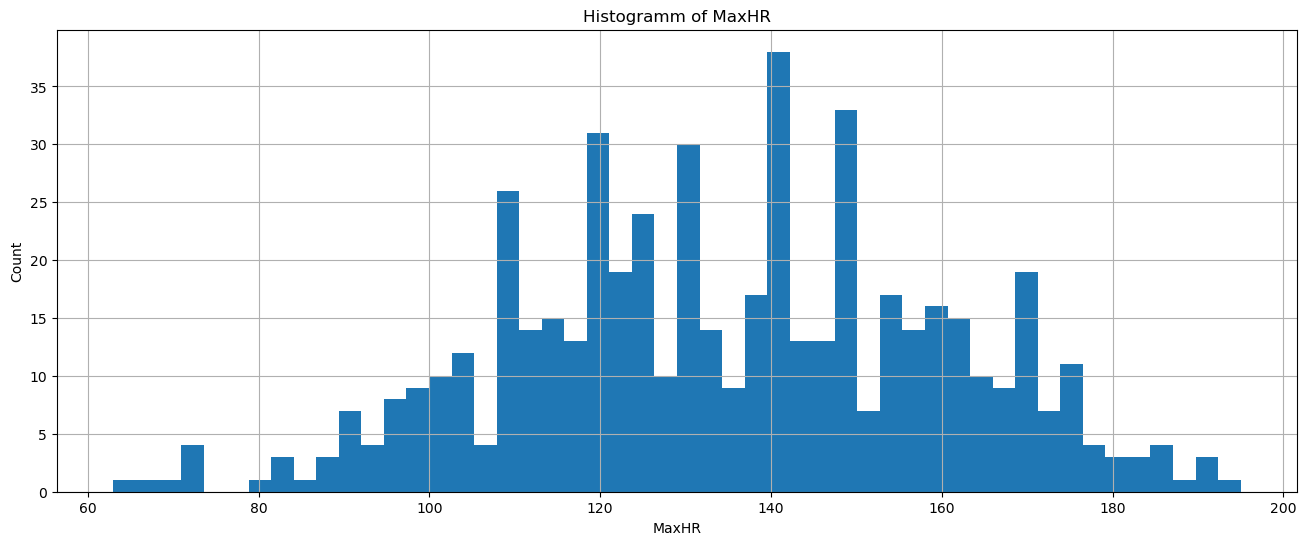

In [132]:
plt.figure(figsize=(16,6))
plt.title('Histogramm of MaxHR')
plt.hist(df['MaxHR'], bins=50)
plt.xlabel('MaxHR')
plt.ylabel('Count')
plt.grid(True)
plt.show()

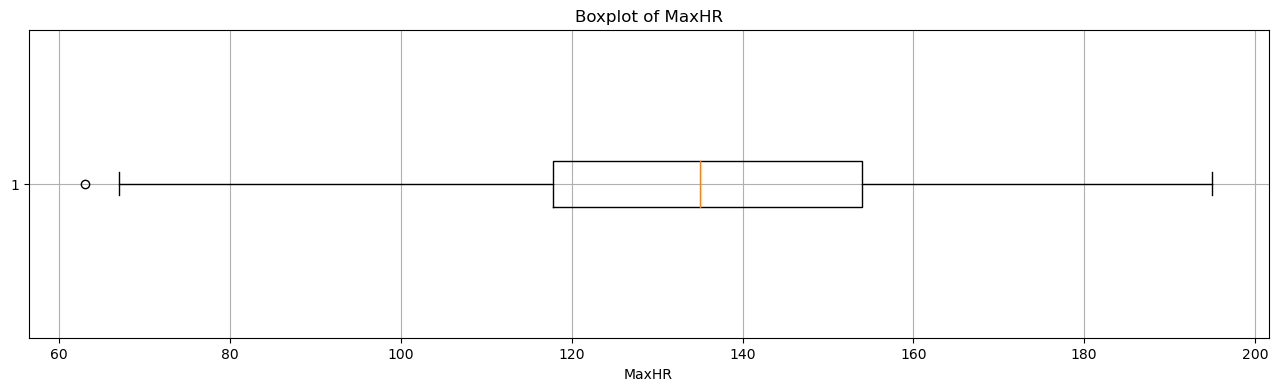

In [133]:
plt.figure(figsize=(16,4))
plt.title('Boxplot of MaxHR')
plt.boxplot(df['MaxHR'],vert=False)
plt.xlabel('MaxHR')
plt.grid(True)
plt.show()

<p style="font-size:20px;padding:1%; border:solid;border-width:thin;border-color:darkcyan"> There are not outliers.

* <p style="font-size:20px">Oldpeak<p>

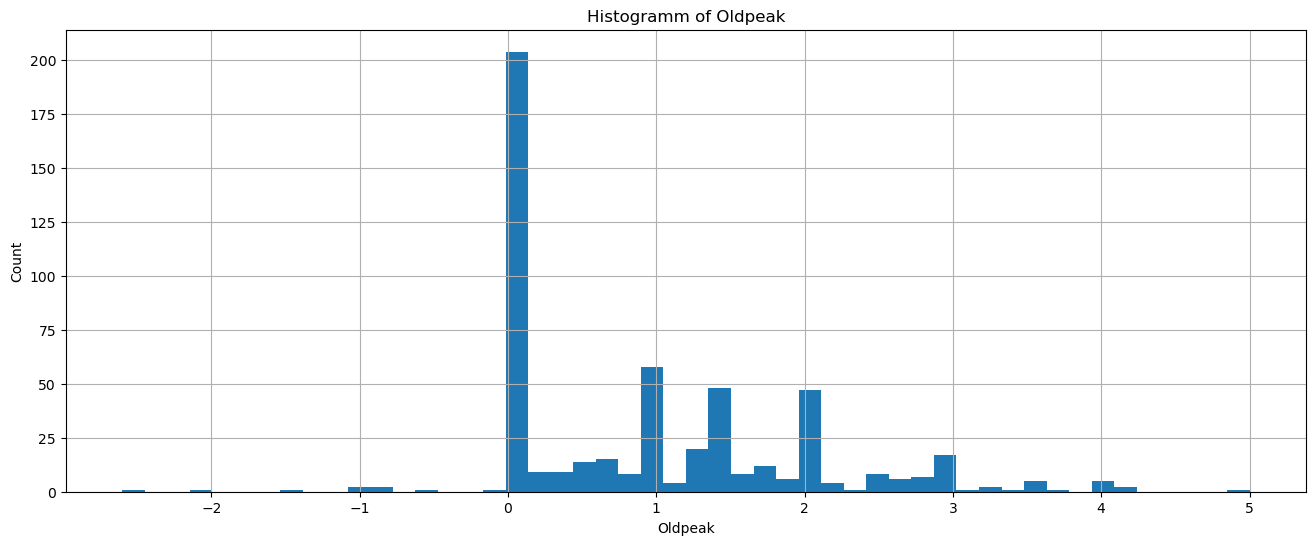

In [134]:
plt.figure(figsize=(16,6))
plt.title('Histogramm of Oldpeak')
plt.hist(df['Oldpeak'], bins=50)
plt.xlabel('Oldpeak')
plt.ylabel('Count')
plt.grid(True)
plt.show()

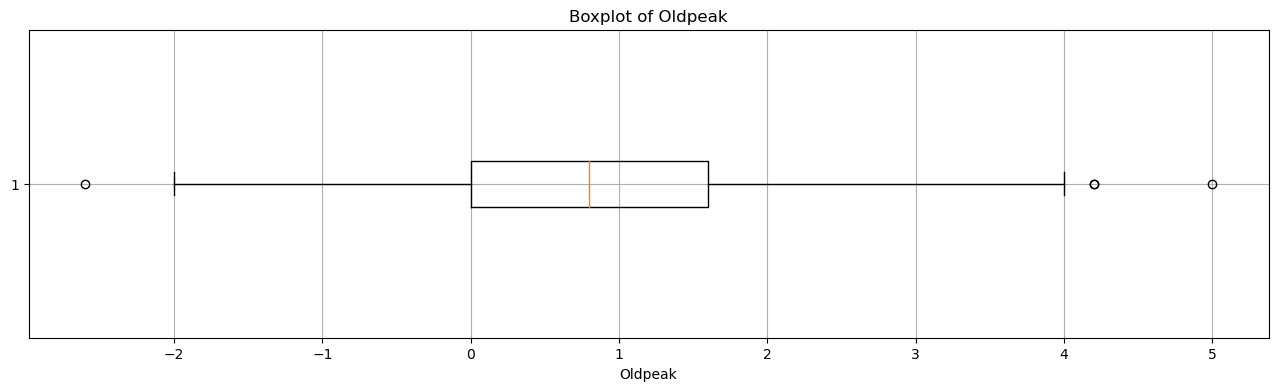

In [135]:
plt.figure(figsize=(16,4))
plt.title('Boxplot of Oldpeak')
plt.boxplot(df['Oldpeak'],vert=False)
plt.xlabel('Oldpeak')
plt.grid(True)
plt.show()

<p style="font-size:20px;padding:1%; border:solid;border-width:thin;border-color:darkcyan"> Most of people have oldpeak 0-0.1. Suppose there are not outliers

### <h3 style="font-size:25px;color:darkcyan;">Categorical features<h3>

<p style = "font-size:20px"> Categorical features are: Sex, ChestPainType, RestingECG, ExerciseAngina, ST_Slope, Fasting BS <p>

* <p style = "font-size:20px"> Sex<p>

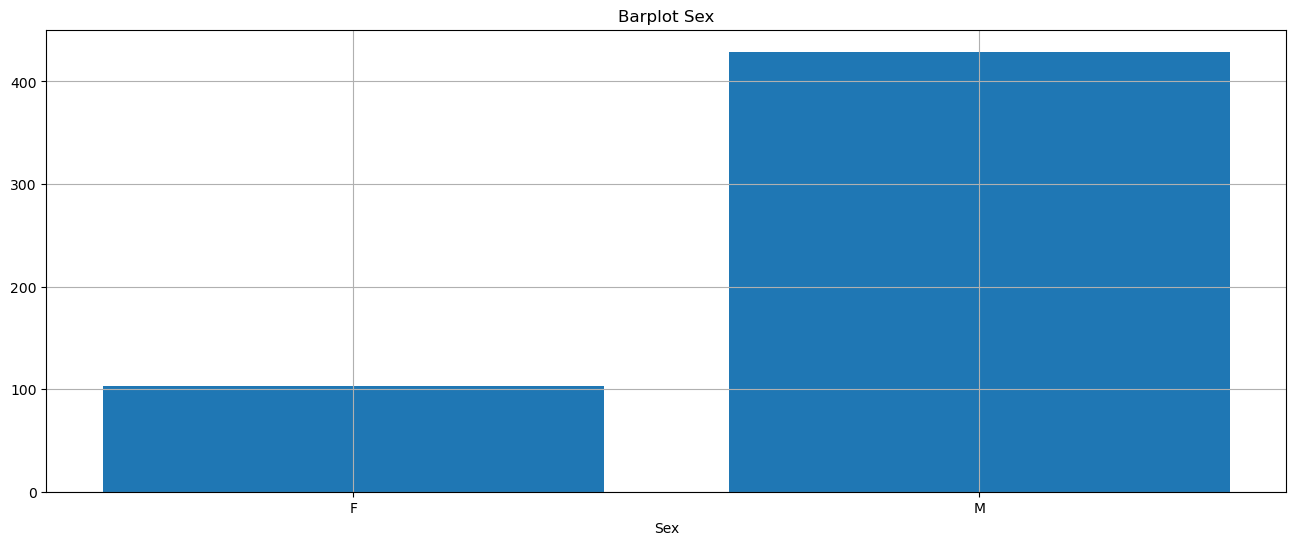

In [136]:
sex_group = df.groupby('Sex')['Sex'].value_counts()
plt.figure(figsize=(16,6))
plt.title('Barplot Sex')
plt.bar(sex_group.index, height=sex_group.values)
plt.xlabel('Sex')
plt.xticks(sex_group.index)
plt.grid(True)
plt.show()

<p style="font-size:20px;padding:1%; border:solid;border-width:thin;border-color:darkcyan"> There are many more men than women <p>

* <p style='font-size:20px'> ChestPainType<p>

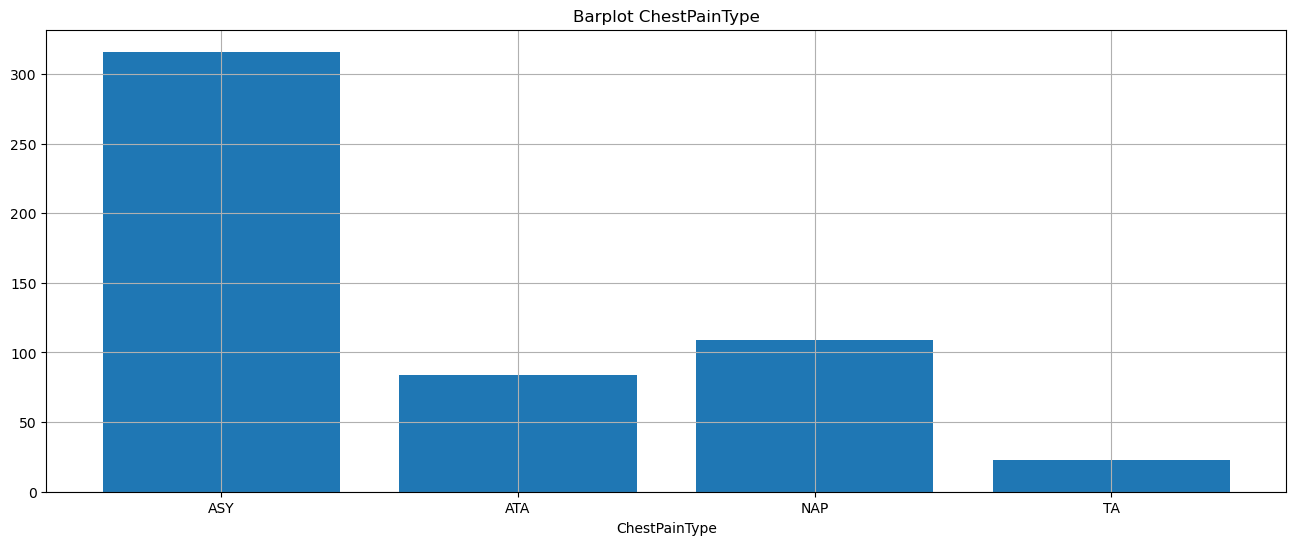

In [137]:
chestPainType_group = df.groupby('ChestPainType')['ChestPainType'].value_counts()
plt.figure(figsize=(16,6))
plt.title('Barplot ChestPainType')
plt.bar(chestPainType_group.index, height=chestPainType_group.values)
plt.xlabel('ChestPainType')
plt.xticks(chestPainType_group.index)
plt.grid(True)
plt.show()

<p style="font-size:20px;padding:1%; border:solid;border-width:thin;border-color:darkcyan">The most common type is ASY<p>

* <p style='font-size:20px'> RestingECG <p>

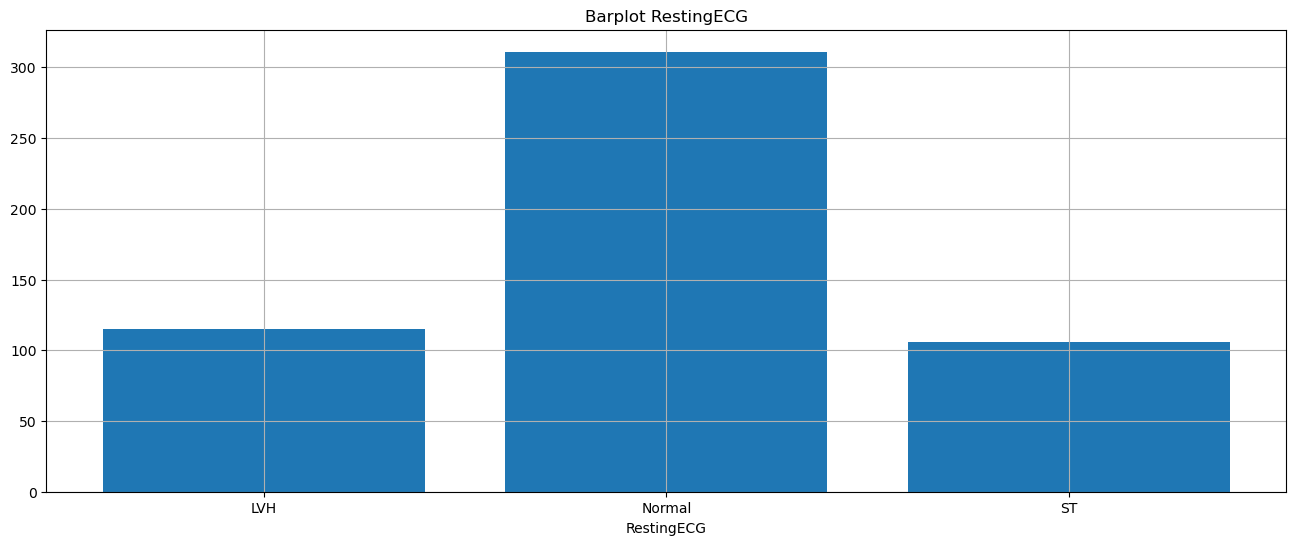

In [138]:
restingECG_group = df.groupby('RestingECG')['RestingECG'].value_counts()
plt.figure(figsize=(16,6))
plt.title('Barplot RestingECG')
plt.bar(restingECG_group.index, height=restingECG_group.values)
plt.xlabel('RestingECG')
plt.xticks(restingECG_group.index)
plt.grid(True)
plt.show()

<p style="font-size:20px;padding:1%; border:solid;border-width:thin;border-color:darkcyan">The most common is Normal<p>

* <p style="font-size:20px"> ExerciseAngina <p>

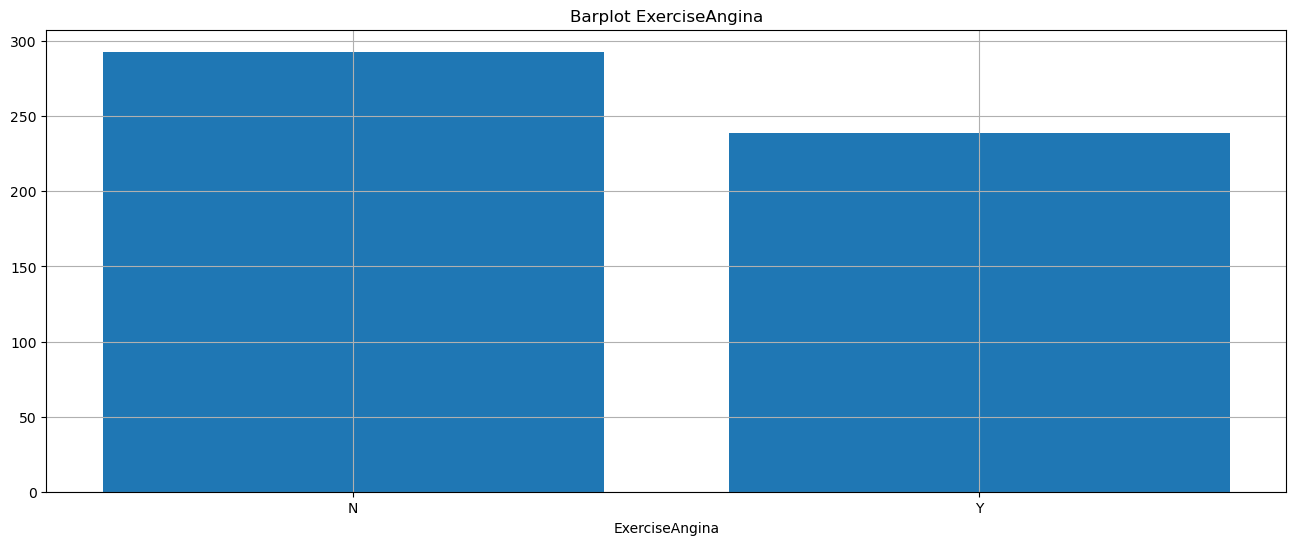

In [139]:
exerciseAngina_group = df.groupby('ExerciseAngina')['ExerciseAngina'].value_counts()
plt.figure(figsize=(16,6))
plt.title('Barplot ExerciseAngina')
plt.bar(exerciseAngina_group.index, height=exerciseAngina_group.values)
plt.xlabel('ExerciseAngina')
plt.xticks(exerciseAngina_group.index)
plt.grid(True)
plt.show()

<p style="font-size:20px;padding:1%; border:solid;border-width:thin;border-color:darkcyan">Absence is a little more common<p>

* <p style="font-size:20px"> ST_Slope <p>

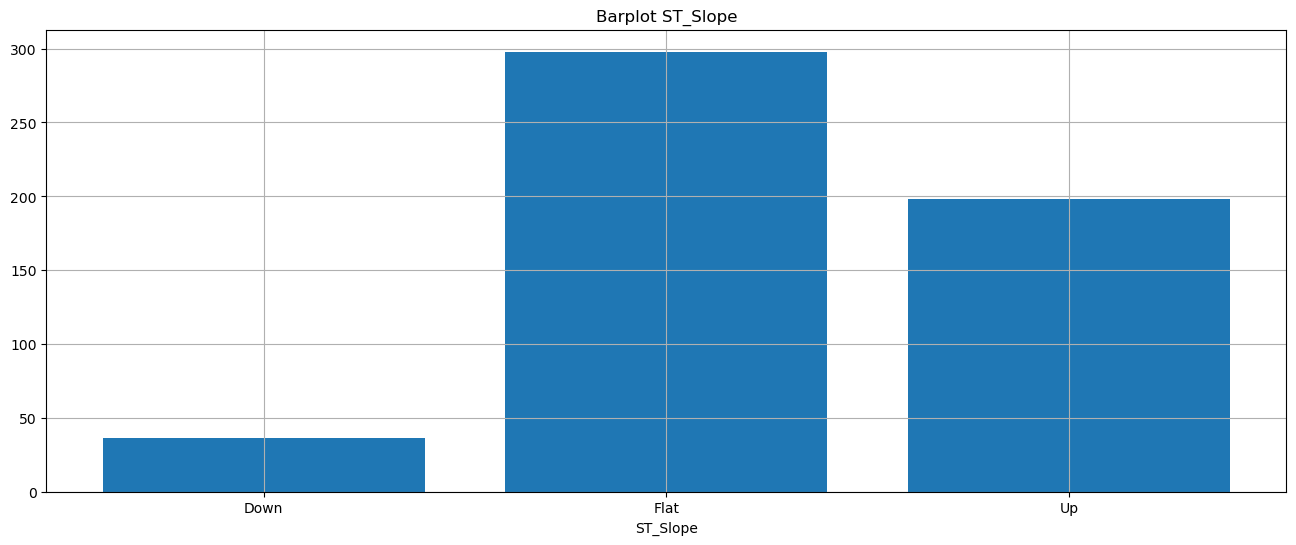

In [140]:
st_slope_group = df.groupby('ST_Slope')['ST_Slope'].value_counts()
plt.figure(figsize=(16,6))
plt.title('Barplot ST_Slope')
plt.bar(st_slope_group.index, height=st_slope_group.values)
plt.xlabel('ST_Slope')
plt.xticks(st_slope_group.index)
plt.grid(True)
plt.show()

<p style="font-size:20px;padding:1%; border:solid;border-width:thin;border-color:darkcyan">Down is very rare<p>

* <p style="fonr-size:20px">Fasting BS <p>

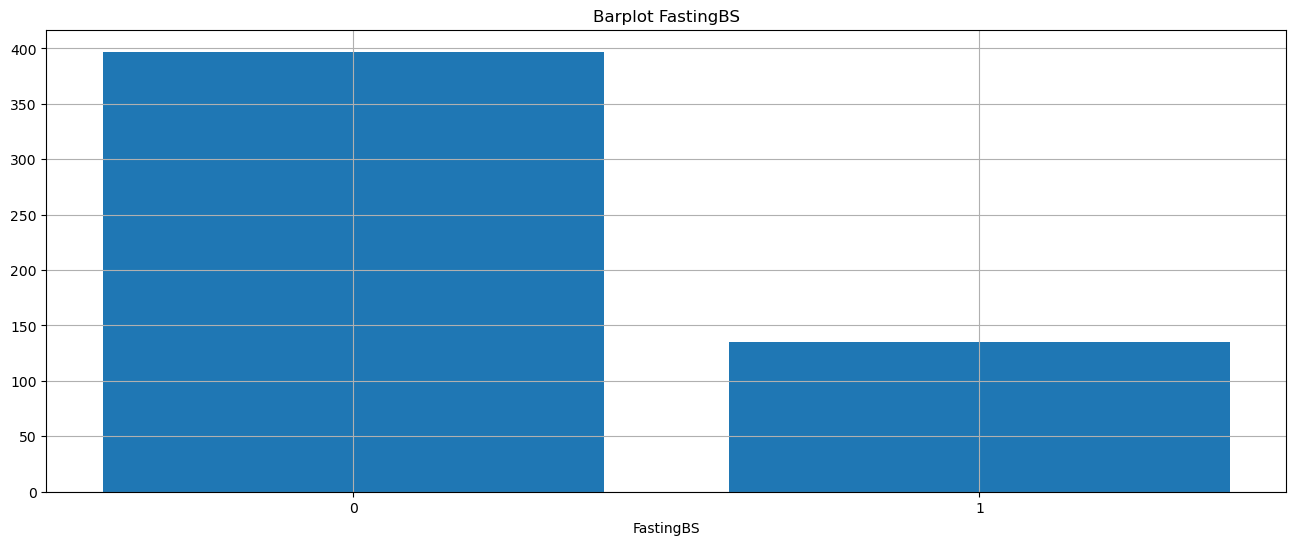

In [141]:
fasting_BS_group = df.groupby('FastingBS')['FastingBS'].value_counts()
plt.figure(figsize=(16,6))
plt.title('Barplot FastingBS')
plt.bar(fasting_BS_group.index, height=fasting_BS_group.values)
plt.xlabel('FastingBS')
plt.xticks(fasting_BS_group.index)
plt.grid(True)
plt.show()

<p style="font-size:20px;padding:1%; border:solid;border-width:thin;border-color:darkcyan">Most of people have fasting blood sugar less then 120<p>

### <h3 style="font-size:25px;color:darkcyan;">Target<h3>

* <p style="fonr-size:20px"> Heart Disease <p>

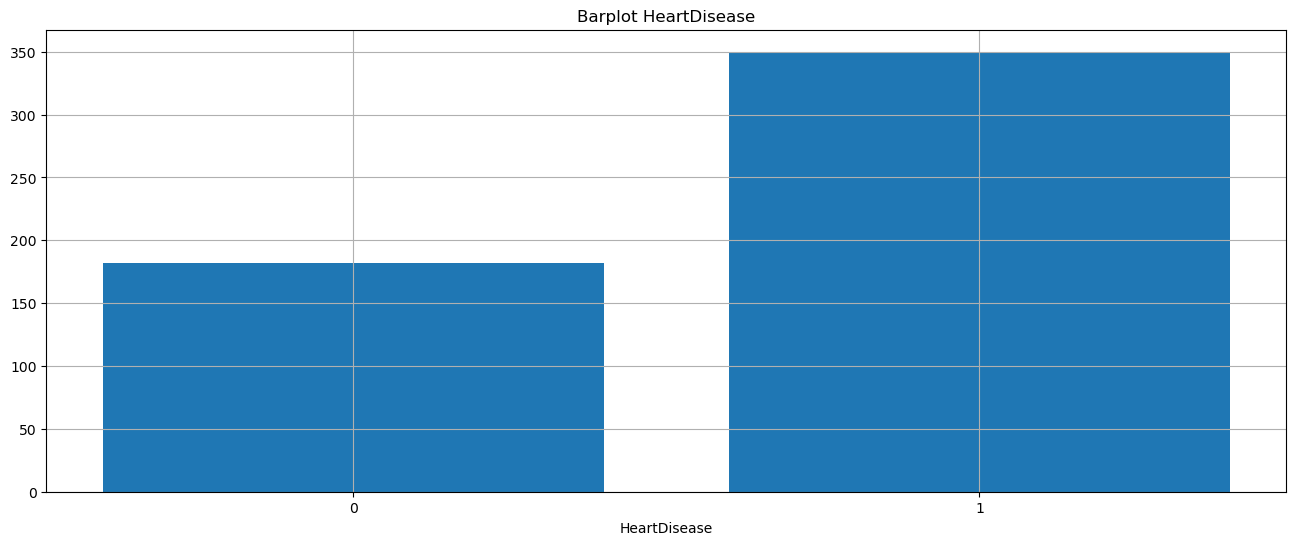

In [142]:
hd_group = df['HeartDisease'].value_counts()
plt.figure(figsize=(16,6))
plt.title('Barplot HeartDisease')
plt.bar(hd_group.index, height=hd_group.values)
plt.xlabel('HeartDisease')
plt.xticks(hd_group.index)
plt.grid(True)
plt.show()

<p style="font-size:20px;padding:1%; border:solid;border-width:thin;border-color:darkcyan">There are unbalanced classes<p>

### <h3 style="font-size:25px;color:darkcyan;">General visualization features<h3>

c:\Users\Hello Tasha\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2000x2000 with 0 Axes>

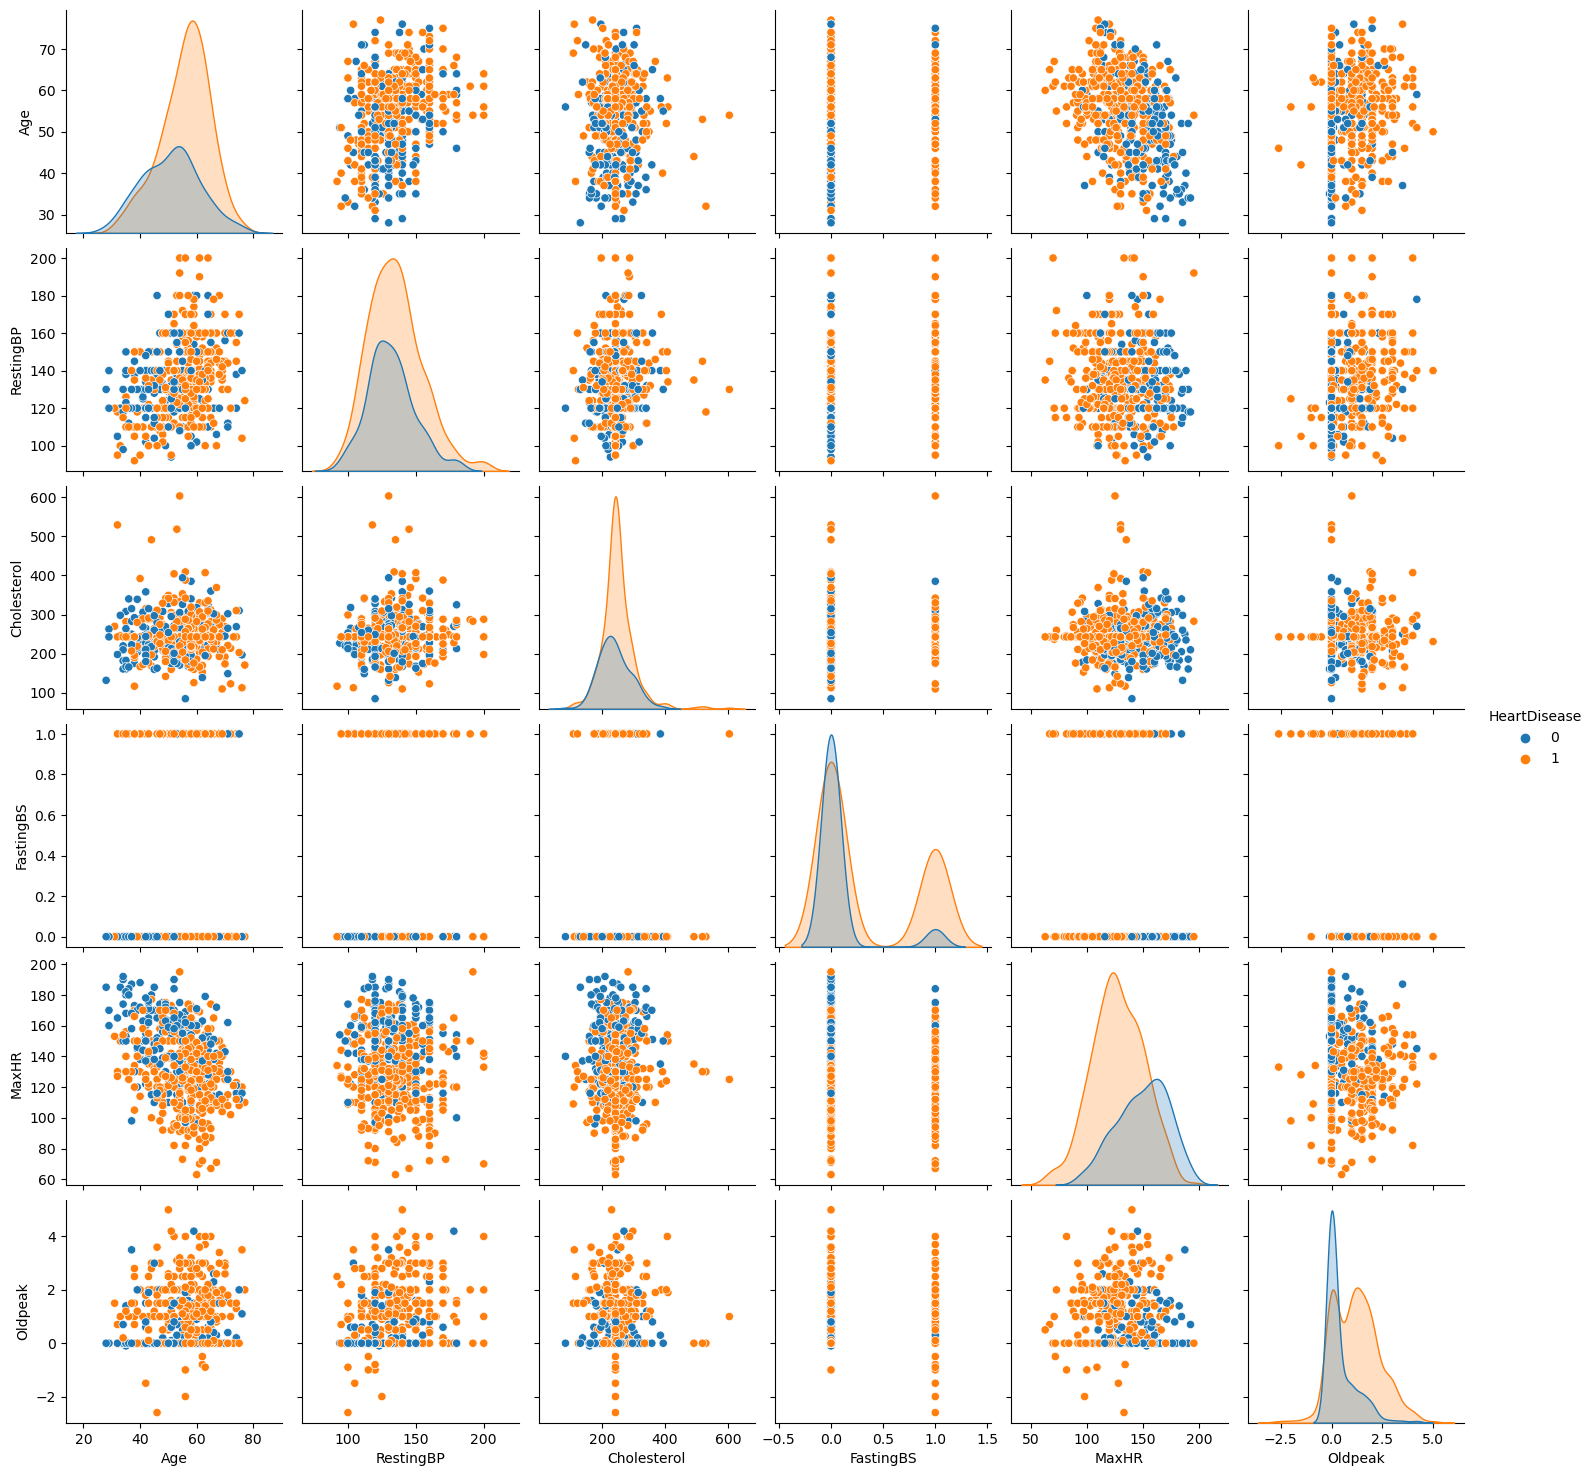

In [143]:
fig = plt.figure(figsize=(20, 20))
sns.pairplot(df, hue="HeartDisease")

* <p style = 'font-size:20px'> Number of people who has heart disease increases after 40 years old <p>
* <p style = 'font-size:20px'> Average values of RestingBP and Cholesterol are similar for people with heart disease and without <p>
* <p style = 'font-size:20px'> Distribution Fasting BS is similar for both <p>
* <p style = 'font-size:20px'> Max HR is little lower for people with heart disease than for without <p>
* <p style = 'font-size:20px'> Oldpeak equally 0 more typical for people without heart disease. Oldpeak equally 0 and 2 more typical for people with heart disease <p>
* <p style = 'font-size:20px'> Max HR decreases with age <p>

interval columns not set, guessing: ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'HeartDisease']


C:\Users\Hello Tasha\AppData\Local\Temp\ipykernel_15492\3049496785.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


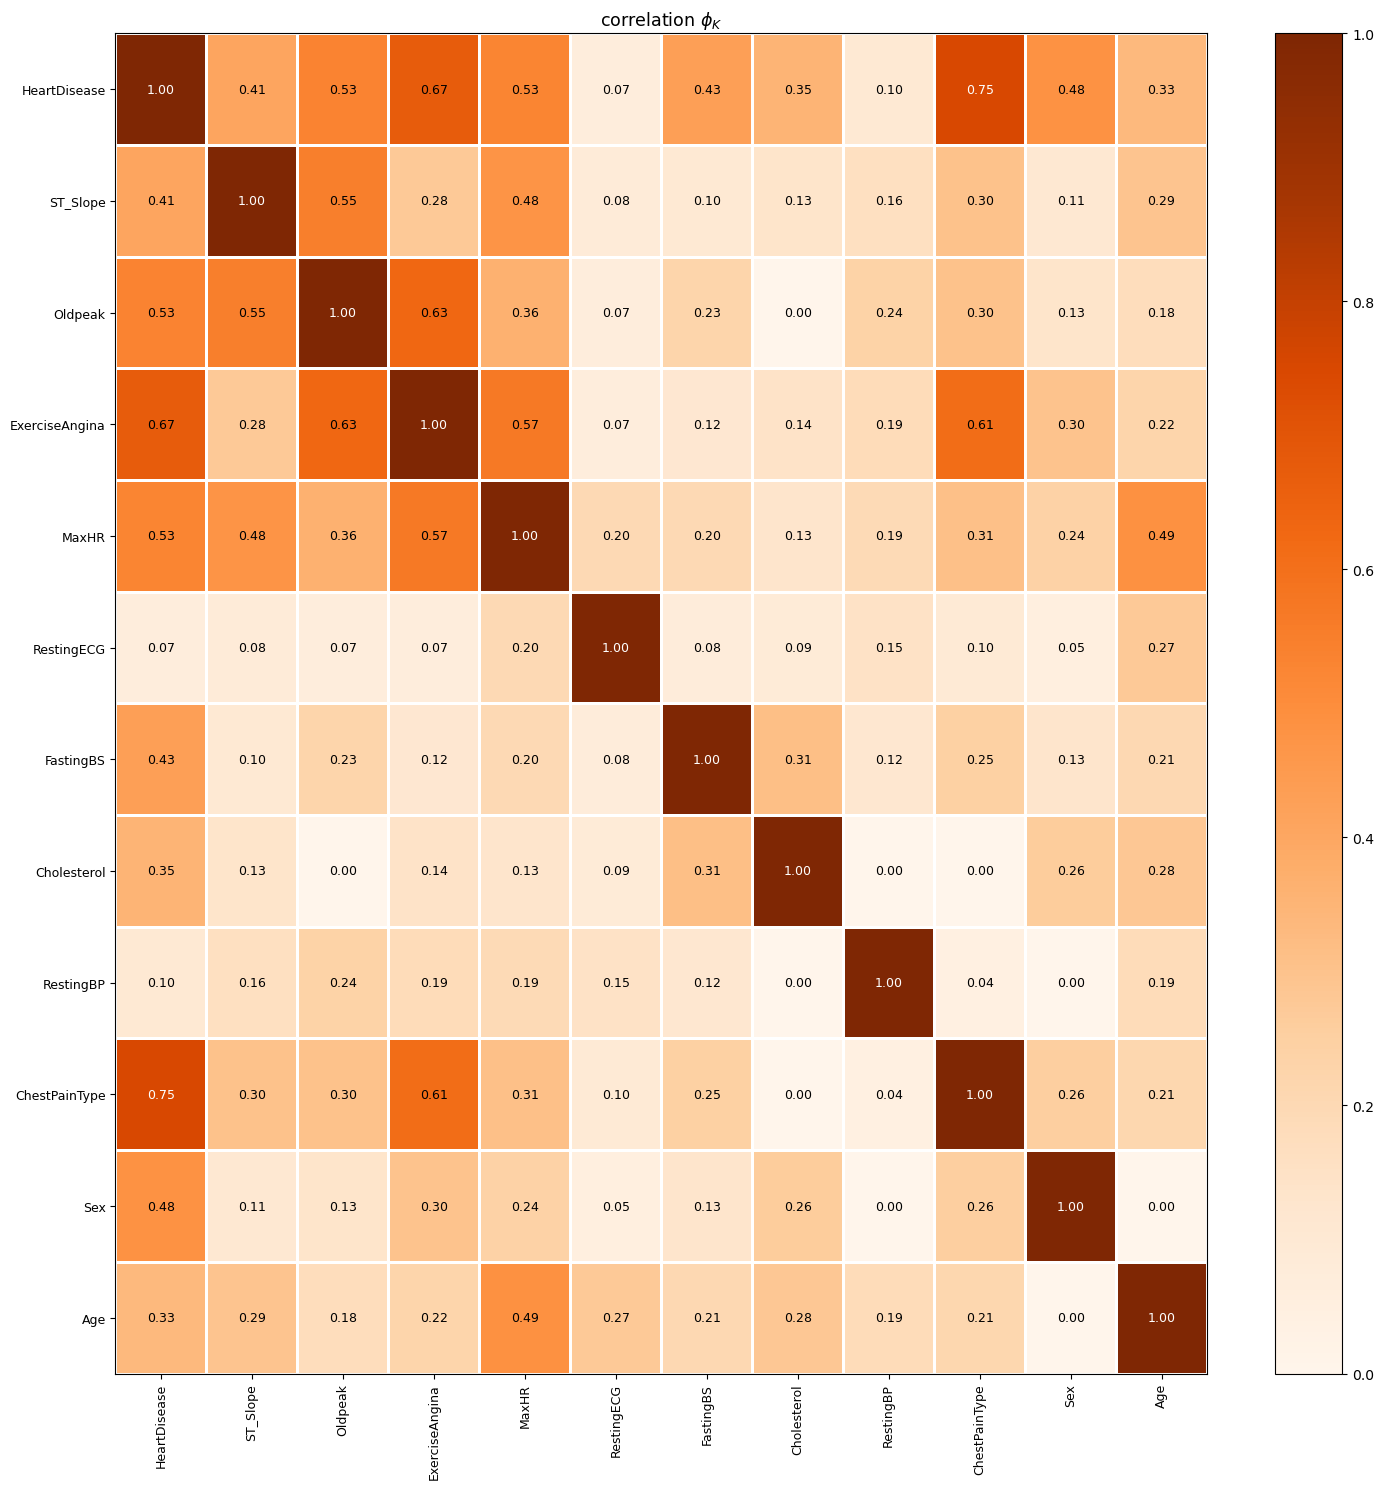

In [144]:
phik_overview = df.phik_matrix()

plot_correlation_matrix(phik_overview.values, 
                        x_labels=phik_overview.columns, 
                        y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map="Oranges", 
                        title=r"correlation $\phi_K$", 
                        fontsize_factor=0.9, figsize=(15, 15))
plt.tight_layout()

<p style="font-size:20px;padding:1%; border:solid;border-width:thin;border-color:darkcyan">There are features that are almost independent of target<p>


## <h2 style="font-size:35px;color:darkcyan;"> Model Building <h2>

### <h3 style="font-size:25px;color:darkcyan;">Train data<h3>

In [145]:
features_train = df.drop('HeartDisease',axis=1)
target_train = df['HeartDisease']
print(features_train.shape)
target_train.shape

(532, 11)


(532,)

### <h3 style="font-size:25px;color:darkcyan;">Pipeline Building<h3>

In [146]:
class Convert_Data(TransformerMixin, BaseEstimator):
    def __init__(self):
        pass

    def fit(self, X, y=None):

        return self
    
    def _define_bp_stage(self, bp):
            return ("Low Blood Pressure" if bp < 80 else 
                "Normal" if 80 <= bp < 120 else 
                "Prehepertention" if 120 <= bp <= 139 else 
                "High Blood Pressure" if 140 <= bp <= 159 else
                "High Blood Pressure Crisis" if 160 <= bp <= 179 else
                "Very High Blood Pressure")
    
    
    def _define_level_chol(self, chol):
        return ("Normal" if chol<200 else "Borderline High" if 200<=chol<239 else "High")

    def transform(self, X):

        for name in X.columns:
            if (X[name].isna().sum() != 0) & (X[name].dtype == 'object'):
                X[name] = X[name].fillna('unknown')
            elif  (X[name].isna().sum() != 0) & (is_numeric_dtype(X[name])):
                X[name] = X[name].fillna(X[name].median())
            else: continue

        X["BP_stage"] = X["RestingBP"].apply(self._define_bp_stage)

        X["Cholesterol_level"] = X["Cholesterol"].apply(self._define_level_chol)

        X = pd.get_dummies(X,drop_first=True)

        return X

In [147]:
cd = Convert_Data()
cd.fit(features_train)
features_train_cd = cd.transform(features_train)
features_train_cd.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up,BP_stage_High Blood Pressure Crisis,BP_stage_Normal,BP_stage_Prehepertention,BP_stage_Very High Blood Pressure,Cholesterol_level_High,Cholesterol_level_Normal
0,74.0,138.0,243.0,0,116,0.2,True,False,True,False,True,False,False,False,True,False,False,True,False,True,False
1,58.0,132.0,224.0,0,173,3.2,True,False,True,False,False,False,False,False,True,False,False,True,False,False,False
2,44.0,150.0,288.0,0,150,3.0,True,True,False,False,True,False,True,True,False,False,False,False,False,True,False
3,50.0,144.0,349.0,0,120,1.0,True,False,False,False,False,False,True,False,True,False,False,False,False,True,False
5,51.0,135.0,160.0,0,150,2.0,True,False,True,False,True,False,False,True,False,False,False,True,False,False,True


<p style="font-size:20px;padding:1%; border:solid;border-width:thin;border-color:darkcyan">Two features (BP_stage and Cholesterol_level) have been added to dataframe and dummy variables have been created
<p>

In [148]:
scaler = StandardScaler()
scaler.fit(features_train_cd)
features_train_sc = pd.DataFrame(scaler.transform(features_train_cd), columns=scaler.feature_names_in_)
features_train_sc.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up,BP_stage_High Blood Pressure Crisis,BP_stage_Normal,BP_stage_Prehepertention,BP_stage_Very High Blood Pressure,Cholesterol_level_High,Cholesterol_level_Normal
0,2.077754,0.219301,-0.068537,-0.583138,-0.754201,-0.690614,0.489993,-0.433013,1.969958,-0.212571,0.842977,-0.498825,-0.903161,-1.128496,1.298795,-0.332637,-0.451243,1.103026,-0.164399,0.773044,-0.414495
1,0.399303,-0.096873,-0.429168,-0.583138,1.529869,2.111877,0.489993,-0.433013,1.969958,-0.212571,-1.186271,-0.498825,-0.903161,-1.128496,1.298795,-0.332637,-0.451243,1.103026,-0.164399,-1.293587,-0.414495
2,-1.069342,0.851647,0.785588,-0.583138,0.608227,1.925045,0.489993,2.309401,-0.507625,-0.212571,0.842977,-0.498825,1.107222,0.886135,-0.769944,-0.332637,-0.451243,-0.906597,-0.164399,0.773044,-0.414495
3,-0.439923,0.535474,1.943402,-0.583138,-0.593915,0.056717,0.489993,-0.433013,-0.507625,-0.212571,-1.186271,-0.498825,1.107222,-1.128496,1.298795,-0.332637,-0.451243,-0.906597,-0.164399,0.773044,-0.414495
4,-0.335020,0.061214,-1.643923,-0.583138,0.608227,0.990881,0.489993,-0.433013,1.969958,-0.212571,0.842977,-0.498825,-0.903161,0.886135,-0.769944,-0.332637,-0.451243,1.103026,-0.164399,-1.293587,2.412574


<p style="font-size:20px;padding:1%; border:solid;border-width:thin;border-color:darkcyan"> All features are on the same scale
<p>

In [149]:
pipe = Pipeline([
    ('ohe_types', Convert_Data()),
    ('scaler', StandardScaler()),
    ('classify', DecisionTreeClassifier(class_weight='balanced', random_state=0))

])
params = [
    {'classify': [RandomForestClassifier(class_weight='balanced', random_state=0)]},
    {'classify': [DecisionTreeClassifier(class_weight='balanced', random_state=0)], 'classify__max_depth': [2, 5, 10, 20]}
]

grid_search = GridSearchCV(pipe, param_grid=params, cv=5, scoring='roc_auc')
grid_search.fit(X=features_train, y=target_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('ohe_types', Convert_Data()),
                                       ('scaler', StandardScaler()),
                                       ('classify',
                                        DecisionTreeClassifier(class_weight='balanced',
                                                               random_state=0))]),
             param_grid=[{'classify': [RandomForestClassifier(class_weight='balanced',
                                                              random_state=0)]},
                         {'classify': [DecisionTreeClassifier(class_weight='balanced',
                                                              random_state=0)],
                          'classify__max_depth': [2, 5, 10, 20]}],
             scoring='roc_auc')

In [151]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classify,param_classify__max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.296357,0.066730,0.028902,0.002361,RandomForestClassifier(class_weight='balanced'...,NaN,{'classify': RandomForestClassifier(class_weig...,0.899614,0.928764,0.905556,0.937897,0.949603,0.924287,0.019004,1
1,0.017941,0.000894,0.015159,0.001466,DecisionTreeClassifier(class_weight='balanced'...,2,{'classify': DecisionTreeClassifier(class_weig...,0.788031,0.838803,0.849206,0.890873,0.878968,0.849176,0.035979,2
2,0.020135,0.001173,0.013570,0.000494,DecisionTreeClassifier(class_weight='balanced'...,5,{'classify': DecisionTreeClassifier(class_weig...,0.765830,0.798649,0.754960,0.816270,0.807540,0.788650,0.023981,3
3,0.022136,0.001460,0.013564,0.000503,DecisionTreeClassifier(class_weight='balanced'...,10,{'classify': DecisionTreeClassifier(class_weig...,0.777220,0.747490,0.771429,0.796429,0.776984,0.773910,0.015695,5
4,0.021536,0.001015,0.013164,0.000977,DecisionTreeClassifier(class_weight='balanced'...,20,{'classify': DecisionTreeClassifier(class_weig...,0.787066,0.739382,0.782540,0.796429,0.810714,0.783226,0.023947,4


<p style="font-size:20px;padding:1%; border:solid;border-width:thin;border-color:darkcyan"> The model RandomForestClassifier showed the best result on the train sample (split_4: roc_auc=0.949)

### <h3 style="font-size:25px;color:darkcyan;">Test data and predictions<h3>

In [152]:
df_test = pd.read_csv(r"C:\Users\Hello Tasha\Desktop\1T_py\Homework\Task_2.9\heart_adapt_test.csv")

In [153]:
features_test = df_test.drop('HeartDisease', axis=1)
target_test = df_test['HeartDisease']

In [154]:
print('Качество модели на тестовой выборке:', {roc_auc_score(target_test, grid_search.predict_proba(features_test)[:, 1])})

Качество модели на тестовой выборке: {0.9073678290213724}


In [155]:
grid_search.best_estimator_

Pipeline(steps=[('ohe_types', Convert_Data()), ('scaler', StandardScaler()),
                ('classify',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=0))])

<p style="font-size:20px;padding:1%; border:solid;border-width:thin;border-color:darkcyan">The best model : RandomForestClassifier, ROC AUC = 0.907<p>


## <h2 style="font-size:35px;color:darkcyan;">Conclusion<h2>

A research was conducted to determine heart disease in patients. The following steps were completed during the EDA: 
- research of dataset, content and data types
- checking emptinesses
- checking for duplicates
- checking data for outliers, data distribution
- general conclusions about the data, the study of dependencies between features

A machine learning pipeline was built:
- added a transformer for processing raw data (processing omissions, adding features, encoding categorical features)
- scaling of features
- model training 
- predictions

As a result of the work performed, the random forest model was trained and ROC AUC metric of 0.907 was obtained.
